# Data Understanding & Exploratory Data Analysis

## Dataset Overview

- **Total Customers:** 7,043
- **Features:** 20 (after removing customerID)
- **Target Variable:** Churn (Yes/No)

## Key Findings

### Target Distribution

The dataset shows a moderate class imbalance:
- **No Churn:** 5,174 customers (73.5%)
- **Yes Churn:** 1,869 customers (26.5%)

This 3:1 ratio confirms that accuracy alone would be a misleading metric. A naive model predicting "No Churn" for all customers would achieve 73.5% accuracy while providing zero business value.

### Data Quality Issues

**TotalCharges Data Type Problem:**
- Currently stored as object (string) instead of numeric
- Contains 11 records with empty space characters
- Requires conversion and handling of missing values in Phase 3

**Encoding Inconsistency:**
- SeniorCitizen is encoded as binary integers (0, 1)
- Other categorical variables use string labels (Yes/No, Male/Female)
- Standardization needed for model compatibility


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the Dataset

The dataset is loaded and a preliminary inspection is performed to verify
that the data has been read correctly.


In [2]:
# Cell 2: Load Data
data = pd.read_csv("Teleco_customer_churn.csv")
print("Dataset shape:")
print(data.shape)
print("\nFirst few rows:")
print(data.head())

Dataset shape:
(7043, 21)

First few rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Strea

## Dataset Structure

Each row represents a single telecom customer.
Columns include service usage, billing information, contract details,
and the churn indicator.


In [3]:
# Cell 3: Basic Information
print("Column names:")
print(data.columns)
print("\nData types and info:")
print(data.info())

Column names:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   I

## Identifier and Target Variable

- `customerID` is an identifier and does not contain predictive information.
- `Churn` is the target variable indicating whether a customer left the service.


In [4]:
# Cell 4: Remove Identifier
if "customerID" in data.columns:
    data = data.drop(columns=["customerID"])
    print("customerID column removed")

customerID column removed


## Target Variable Distribution

Understanding whether churn is balanced or imbalanced
is critical before modeling.


In [5]:
# Cell 5: Target Distribution
data["Churn"].value_counts()
data["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

## Data Quality Check

This step identifies missing values and potential data issues
that must be addressed during preprocessing.


In [6]:
# Missing values per column
data.isnull().sum()

# Investigate TotalCharges formatting issue
data["TotalCharges"].dtype, (data["TotalCharges"] == " ").sum()


(dtype('O'), np.int64(11))

In [7]:
print("SeniorCitizen:", data["SeniorCitizen"].unique())
print("Gender:", data["gender"].unique())
print("Partner:", data["Partner"].unique())


SeniorCitizen: [0 1]
Gender: ['Female' 'Male']
Partner: ['Yes' 'No']


## Churn Distribution

Understanding the balance of the target variable is critical, as class imbalance
can significantly affect model evaluation and business decisions.


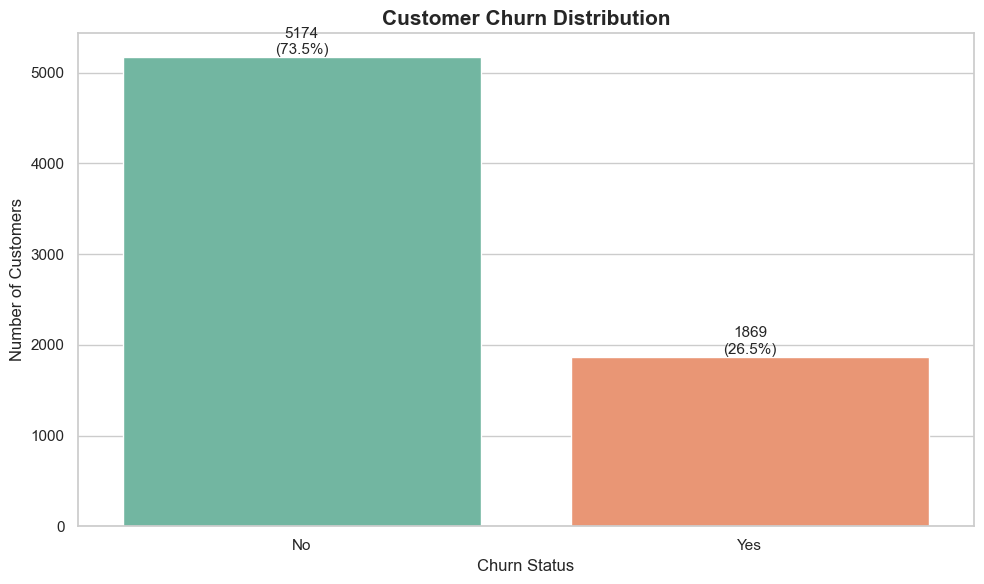

In [8]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


ax = sns.countplot(data=data, x="Churn", hue="Churn", palette="Set2", legend=False)

plt.title("Customer Churn Distribution", fontsize=15, fontweight="bold")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")

# Add count + percentage labels
total = len(data)
for p in ax.patches:
    count = int(p.get_height())
    percentage = f"{100 * count / total:.1f}%"
    ax.annotate(f"{count}\n({percentage})",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.show()


## Churn vs Tenure

Tenure is a strong proxy for customer engagement and loyalty.
Short-tenure customers are often more likely to churn.


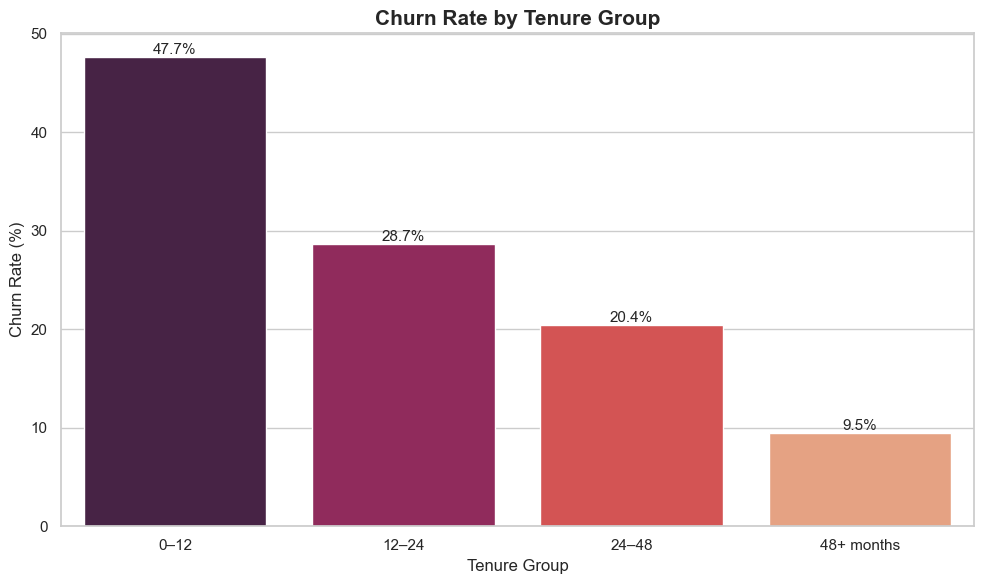

In [9]:
data["TenureGroup"] = pd.cut(
    data["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0–12", "12–24", "24–48", "48+ months"]
)

tenure_churn = (
    data.groupby("TenureGroup", observed=True)["Churn"]
    .apply(lambda x: (x == "Yes").mean() * 100)
    .reset_index(name="ChurnRate")
)

ax = sns.barplot(
    data=tenure_churn,
    x="TenureGroup",
    y="ChurnRate",
    hue="TenureGroup",
    palette="rocket",
    legend=False
)

plt.title("Churn Rate by Tenure Group", fontsize=15, fontweight="bold")
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate (%)")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.show()


## Monthly Charges vs Churn

Pricing sensitivity is a key driver of churn.
Comparing charge distributions helps reveal cost-related dissatisfaction.


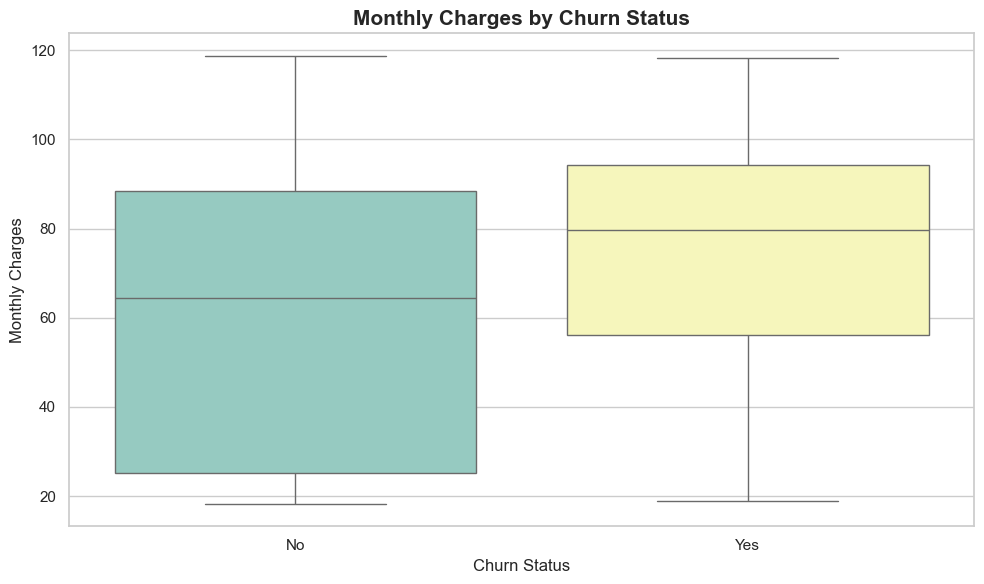

In [10]:
sns.boxplot(data=data, x="Churn", y="MonthlyCharges", hue="Churn", palette="Set3", legend=False)

plt.title("Monthly Charges by Churn Status", fontsize=15, fontweight="bold")
plt.xlabel("Churn Status")
plt.ylabel("Monthly Charges")

plt.tight_layout()
plt.show()


## Churn by Contract Type

Contract duration often introduces switching friction.
Month-to-month contracts typically exhibit higher churn.


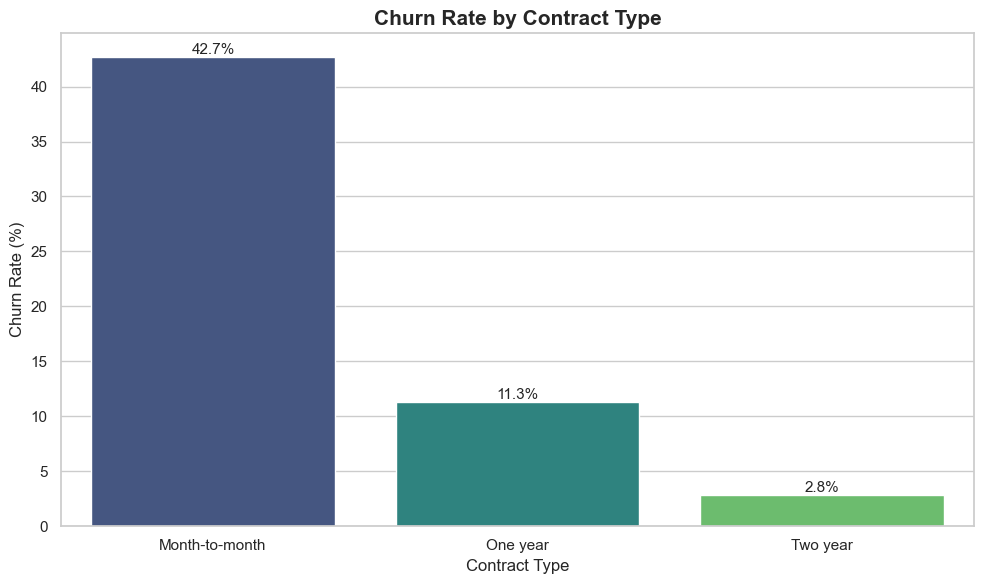

In [11]:
contract_churn = (
    data.groupby("Contract")["Churn"]
    .apply(lambda x: (x == "Yes").mean() * 100)
    .reset_index(name="ChurnRate")
    .sort_values("ChurnRate", ascending=False)
)

ax = sns.barplot(
    data=contract_churn,
    x="Contract",
    y="ChurnRate",
    hue="Contract",
    palette="viridis",
    legend=False
)

plt.title("Churn Rate by Contract Type", fontsize=15, fontweight="bold")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate (%)")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.show()


## Churn by Internet Service Type

Different service offerings may correspond to different churn behaviors
due to performance, pricing, or customer expectations.


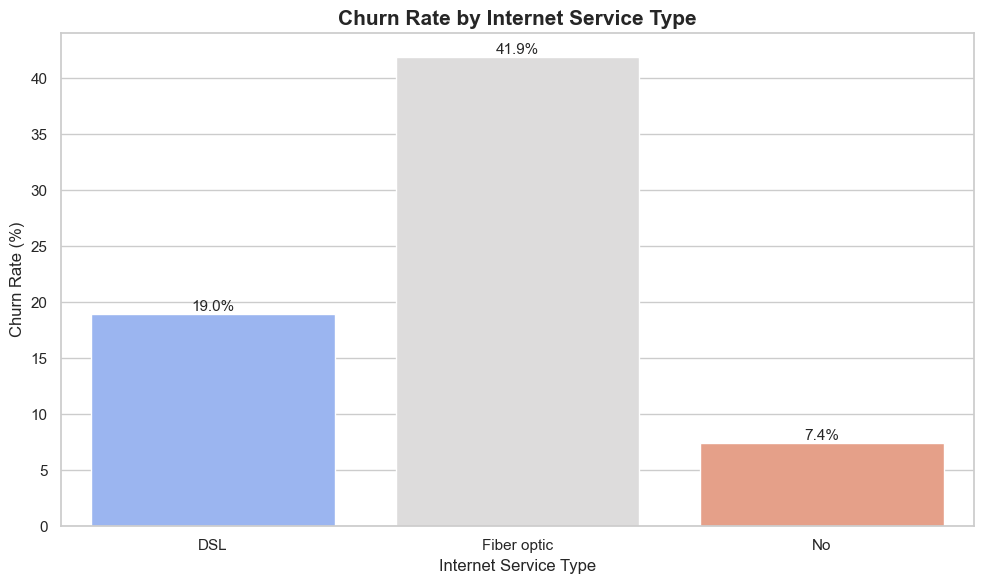

In [12]:
internet_churn = (
    data.groupby("InternetService")["Churn"]
    .apply(lambda x: (x == "Yes").mean() * 100)
    .reset_index(name="ChurnRate")
)

ax = sns.barplot(
    data=internet_churn,
    x="InternetService",
    y="ChurnRate",
    hue="InternetService",
    palette="coolwarm",
    legend=False
)

plt.title("Churn Rate by Internet Service Type", fontsize=15, fontweight="bold")
plt.xlabel("Internet Service Type")
plt.ylabel("Churn Rate (%)")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.show()


## Summary

Key observations from EDA:

- Churn is **moderately imbalanced**, reinforcing the need for recall-focused metrics.
- Customers with **shorter tenure** show significantly higher churn.
- **Month-to-month contracts** are strongly associated with churn.
- Higher **monthly charges** correlate with increased churn risk.

These insights guide will help in feature engineering and model selection.


## Feature Engineering

### Target Variable Preparation

The target variable `Churn` was converted into a binary format to ensure
compatibility with machine learning models and evaluation metrics.


## Handling TotalCharges Missing Values
**Replacing spaces with 0 and converting them to numeric**

In [13]:

data['TotalCharges'] = data['TotalCharges'].replace(' ', '0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

print("TotalCharges conversion complete")
print(f"Data type: {data['TotalCharges'].dtype}")
print(f"Missing values: {data['TotalCharges'].isnull().sum()}")

TotalCharges conversion complete
Data type: float64
Missing values: 0


## Preparing target variable
Converting `Churn` to **Binary**

In [14]:

data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
print("Churn encoding:")
print(data['Churn'].value_counts())

Churn encoding:
Churn
0    5174
1    1869
Name: count, dtype: int64


## Encoding Binary Variables 

Since many of the data is not machine readble we are using **Binary Encoding** to convert Yes/No Identifiers to 1/0

In [15]:
# Cell: Encode Binary Variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binary_cols:
    print(f"\n{col} unique values: {data[col].unique()}")
    
# Map binary variables
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})

print("\nBinary encoding complete")



gender unique values: ['Female' 'Male']

Partner unique values: ['Yes' 'No']

Dependents unique values: ['No' 'Yes']

PhoneService unique values: ['No' 'Yes']

PaperlessBilling unique values: ['Yes' 'No']

Binary encoding complete


In [16]:
# Cell: Drop TenureGroup (created for visualization only)
if 'TenureGroup' in data.columns:
    data = data.drop(columns=['TenureGroup'])

## One - Hot Encoding
Since there are many Identifiers with multiple variables we cannot use binary encoding to make them machine readable.
In which case will will use **One - Hot Encoding** to make them catergorical variables

In [17]:
# Cell: One-Hot Encode ALL Categorical Variables
categorical_cols = [
    'MultipleLines', 
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport',
    'StreamingTV', 
    'StreamingMovies', 
    'Contract', 
    'PaymentMethod'
]

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(f"Original shape: {data.shape}")
print(f"After encoding shape: {data_encoded.shape}")

# Verify no object columns remain (except we want to keep our work clean)
print("\nData types after encoding:")
print(data_encoded.dtypes.value_counts())

# Check if any object columns remain
remaining_objects = data_encoded.select_dtypes(include=['object']).columns.tolist()
if remaining_objects:
    print(f"\nWARNING: These columns are still objects: {remaining_objects}")
else:
    print("\n✅ All categorical variables encoded successfully")

Original shape: (7043, 20)
After encoding shape: (7043, 31)

Data types after encoding:
bool       21
int64       8
float64     2
Name: count, dtype: int64

✅ All categorical variables encoded successfully


### Train-Test Split
- 80-20 split with stratification to maintain churn distribution
- Training set: [X] samples
- Test set: [X] samples
- Churn rate preserved in both sets (~26.5%)


In [18]:
# Cell: Train-Test Split
from sklearn.model_selection import train_test_split

# Separate features and target
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Split data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nChurn distribution in training set:")
print(y_train.value_counts(normalize=True))
print(f"\nChurn distribution in test set:")
print(y_test.value_counts(normalize=True))

Training set size: (5634, 30)
Test set size: (1409, 30)

Churn distribution in training set:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Churn distribution in test set:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


### Feature Scaling
As we are using models that are sensitive to feature scale (e.g., logistic regression), scaling is required.
- Applied StandardScaler to numerical features (tenure, MonthlyCharges, TotalCharges)
- Necessary for logistic regression to perform optimally

In [19]:
# Cell: Feature Scaling
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize scaler
scaler = StandardScaler()

# IMPORTANT: Scale only after train-test split to avoid data leakage
# Fit scaler on training data only, then transform both train and test
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical features scaled (training set):")
print(X_train[numerical_cols].describe())
print("\nScaler statistics (from training data):")
print(f"Mean: {scaler.mean_}")
print(f"Std: {scaler.scale_}")

Numerical features scaled (training set):
             tenure  MonthlyCharges  TotalCharges
count  5.634000e+03    5.634000e+03  5.634000e+03
mean  -1.008935e-17   -2.402527e-16  2.522338e-17
std    1.000089e+00    1.000089e+00  1.000089e+00
min   -1.322329e+00   -1.544028e+00 -1.008922e+00
25%   -9.559779e-01   -9.711977e-01 -8.321009e-01
50%   -1.418632e-01    1.848336e-01 -3.968446e-01
75%    9.164859e-01    8.319124e-01  6.741944e-01
max    1.608483e+00    1.785939e+00  2.801869e+00

Scaler statistics (from training data):
Mean: [  32.48509052   64.92996095 2299.33468229]
Std: [  24.56656302   30.13543058 2279.0019965 ]


## Phase 4: Baseline Model — Logistic Regression

Logistic Regression was chosen as the baseline model due to its simplicity,
interpretability, and strong performance on linearly separable classification
problems. As a regression-based classification model, it provides probability
outputs, which are crucial for churn prediction where risk prioritization
matters more than hard class labels.

This model serves as a reference point against which more complex models
will be compared in later phases.


In [20]:
# Cell: Import Model and Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve,
    precision_recall_curve,
    average_precision_score,
    precision_score,
    recall_score,
    f1_score
)


In [21]:
# Cell: Train Logistic Regression with Class Balancing
# Initialize model with balanced class weights and increased max_iter for convergence
log_reg = LogisticRegression(
    class_weight='balanced', 
    random_state=42, 
    max_iter=2000,
    solver='lbfgs'  # Explicitly set solver
)

# Train the model
log_reg.fit(X_train, y_train)

print("Logistic Regression model trained successfully")
print(f"Number of features used: {X_train.shape[1]}")
print(f"Number of iterations: {log_reg.n_iter_[0]}")


Logistic Regression model trained successfully
Number of features used: 30
Number of iterations: 43


In [22]:
# Cell 3: Make Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
print(f"Predicted churners: {sum(y_pred)}")
print(f"Actual churners: {sum(y_test)}")

Predicted churners: 581
Actual churners: 374


In [23]:
# Cell 4: Performance Metrics
print("LOGISTIC REGRESSION PERFORMANCE")
print("=" * 50)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nKey Metrics:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

LOGISTIC REGRESSION PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.90      0.72      0.80      1035
       Churn       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409


Key Metrics:
Precision: 0.504
Recall: 0.783
F1-Score: 0.614
ROC-AUC: 0.842


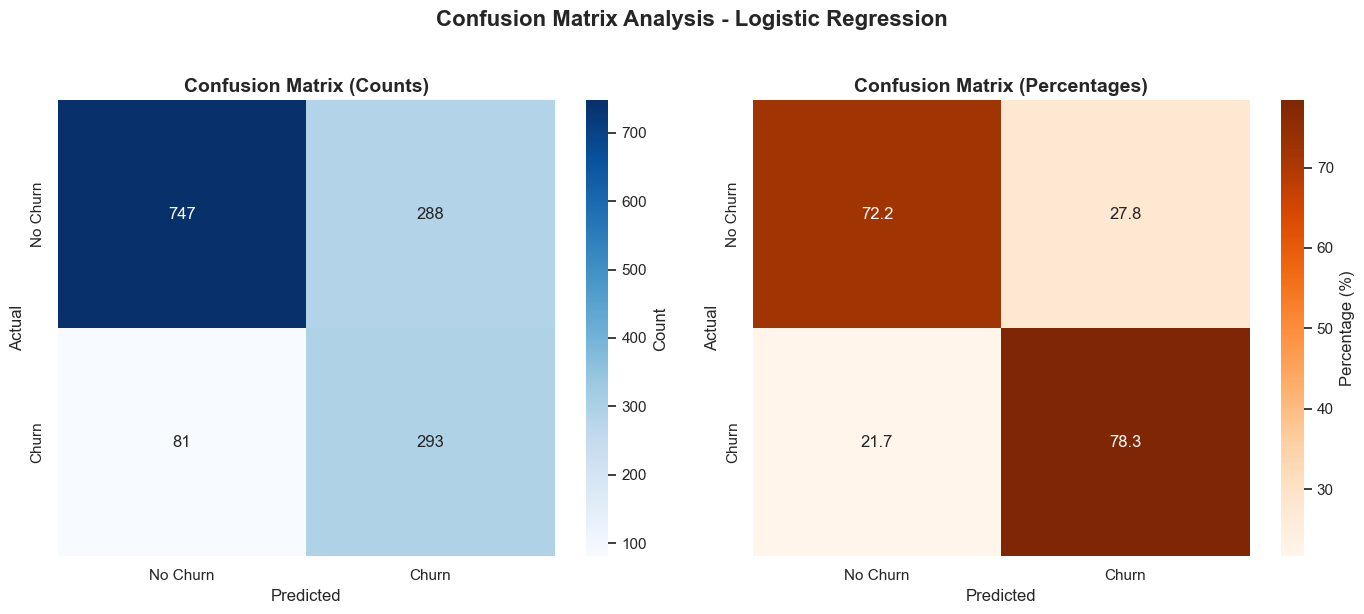


Confusion Matrix Breakdown:
True Negatives (TN):   747  (72.2% of predicted 'No Churn')
False Positives (FP):  288  (27.8% of predicted 'No Churn')
False Negatives (FN):   81  (21.7% of predicted 'Churn')
True Positives (TP):   293  (78.3% of predicted 'Churn')


In [24]:
# Cell 5: Enhanced Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create a more informative confusion matrix with percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Count confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            cbar_kws={'label': 'Count'})
ax1.set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Actual', fontsize=12)
ax1.set_xlabel('Predicted', fontsize=12)

# Percentage confusion matrix
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Oranges', ax=ax2,
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            cbar_kws={'label': 'Percentage (%)'})
ax2.set_title('Confusion Matrix (Percentages)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=12)
ax2.set_xlabel('Predicted', fontsize=12)

plt.suptitle('Confusion Matrix Analysis - Logistic Regression', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN):  {tn:4d}  ({tn/(tn+fp)*100:.1f}% of predicted 'No Churn')")
print(f"False Positives (FP): {fp:4d}  ({fp/(tn+fp)*100:.1f}% of predicted 'No Churn')")
print(f"False Negatives (FN): {fn:4d}  ({fn/(fn+tp)*100:.1f}% of predicted 'Churn')")
print(f"True Positives (TP):  {tp:4d}  ({tp/(fn+tp)*100:.1f}% of predicted 'Churn')")

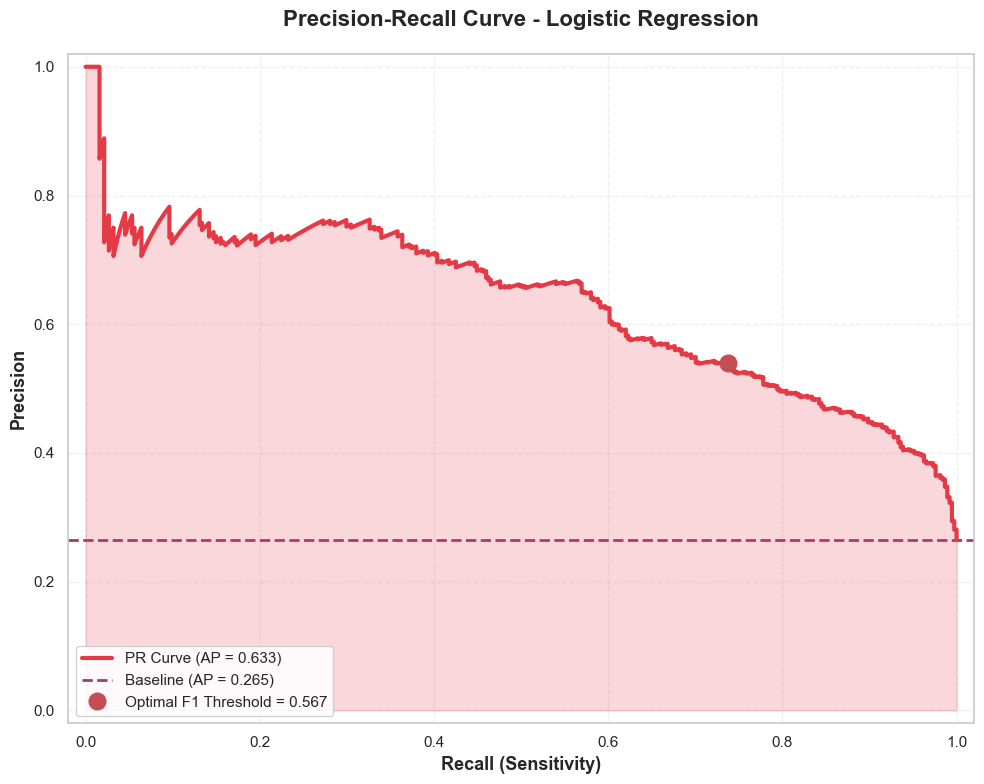


Average Precision: 0.633
Optimal F1 Threshold: 0.567
At this threshold: Precision = 0.540, Recall = 0.738
F1 Score: 0.624


In [25]:
# Cell 6b: Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='#E63946', lw=3, 
         label=f'PR Curve (AP = {avg_precision:.3f})', zorder=3)

# Add baseline (random classifier)
baseline = sum(y_test) / len(y_test)
plt.axhline(y=baseline, color='#A23B72', lw=2, linestyle='--', 
            label=f'Baseline (AP = {baseline:.3f})', zorder=1)

# Fill area under curve
plt.fill_between(recall, precision, alpha=0.2, color='#E63946', zorder=2)

# Find optimal threshold (F1 score)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_pr_idx = np.argmax(f1_scores)
optimal_pr_threshold = pr_thresholds[optimal_pr_idx]
plt.plot(recall[optimal_pr_idx], precision[optimal_pr_idx], 'ro', markersize=12,
         label=f'Optimal F1 Threshold = {optimal_pr_threshold:.3f}', zorder=4)

plt.xlabel('Recall (Sensitivity)', fontsize=13, fontweight='bold')
plt.ylabel('Precision', fontsize=13, fontweight='bold')
plt.title('Precision-Recall Curve - Logistic Regression', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc="lower left", fontsize=11, framealpha=0.9)
plt.grid(alpha=0.3, linestyle='--', zorder=0)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.tight_layout()
plt.show()

print(f"\nAverage Precision: {avg_precision:.3f}")
print(f"Optimal F1 Threshold: {optimal_pr_threshold:.3f}")
print(f"At this threshold: Precision = {precision[optimal_pr_idx]:.3f}, Recall = {recall[optimal_pr_idx]:.3f}")
print(f"F1 Score: {f1_scores[optimal_pr_idx]:.3f}")


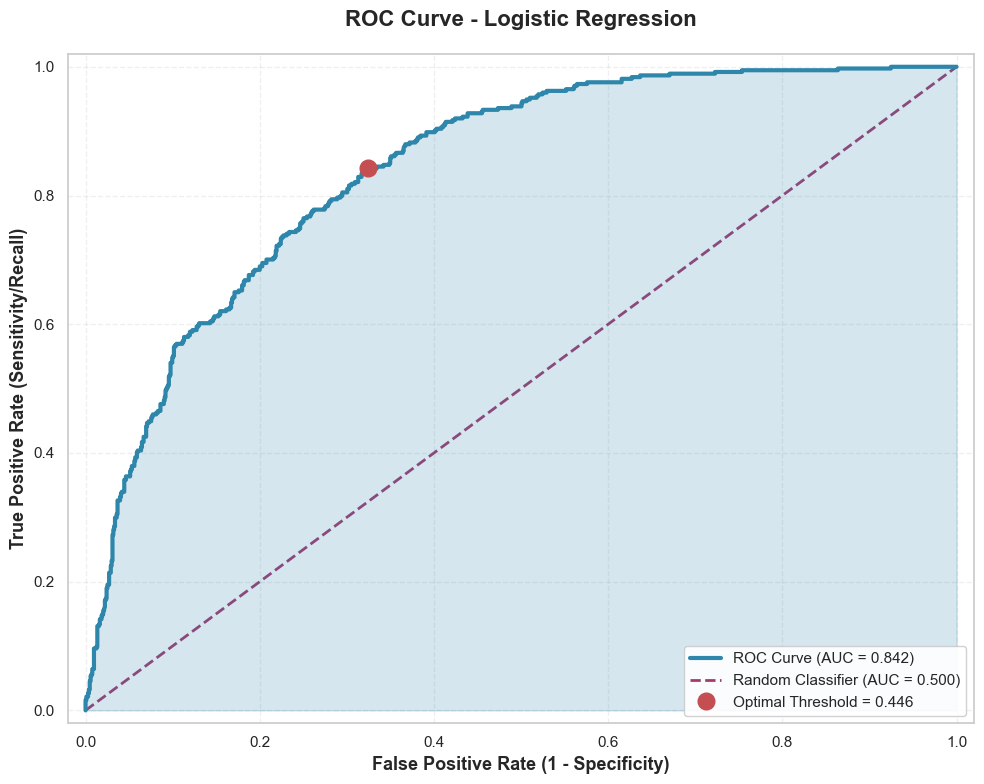


Optimal Threshold: 0.446
At this threshold: TPR = 0.842, FPR = 0.325


In [26]:
# Cell 6: Enhanced ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='#2E86AB', lw=3, label=f'ROC Curve (AUC = {roc_auc:.3f})', zorder=3)
plt.plot([0, 1], [0, 1], color='#A23B72', lw=2, linestyle='--', label='Random Classifier (AUC = 0.500)', zorder=1)

# Fill area under curve
plt.fill_between(fpr, tpr, alpha=0.2, color='#2E86AB', zorder=2)

# Add optimal threshold point
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=12, 
         label=f'Optimal Threshold = {optimal_threshold:.3f}', zorder=4)

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=13, fontweight='bold')
plt.title('ROC Curve - Logistic Regression', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc="lower right", fontsize=11, framealpha=0.9)
plt.grid(alpha=0.3, linestyle='--', zorder=0)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.tight_layout()
plt.show()

print(f"\nOptimal Threshold: {optimal_threshold:.3f}")
print(f"At this threshold: TPR = {tpr[optimal_idx]:.3f}, FPR = {fpr[optimal_idx]:.3f}")

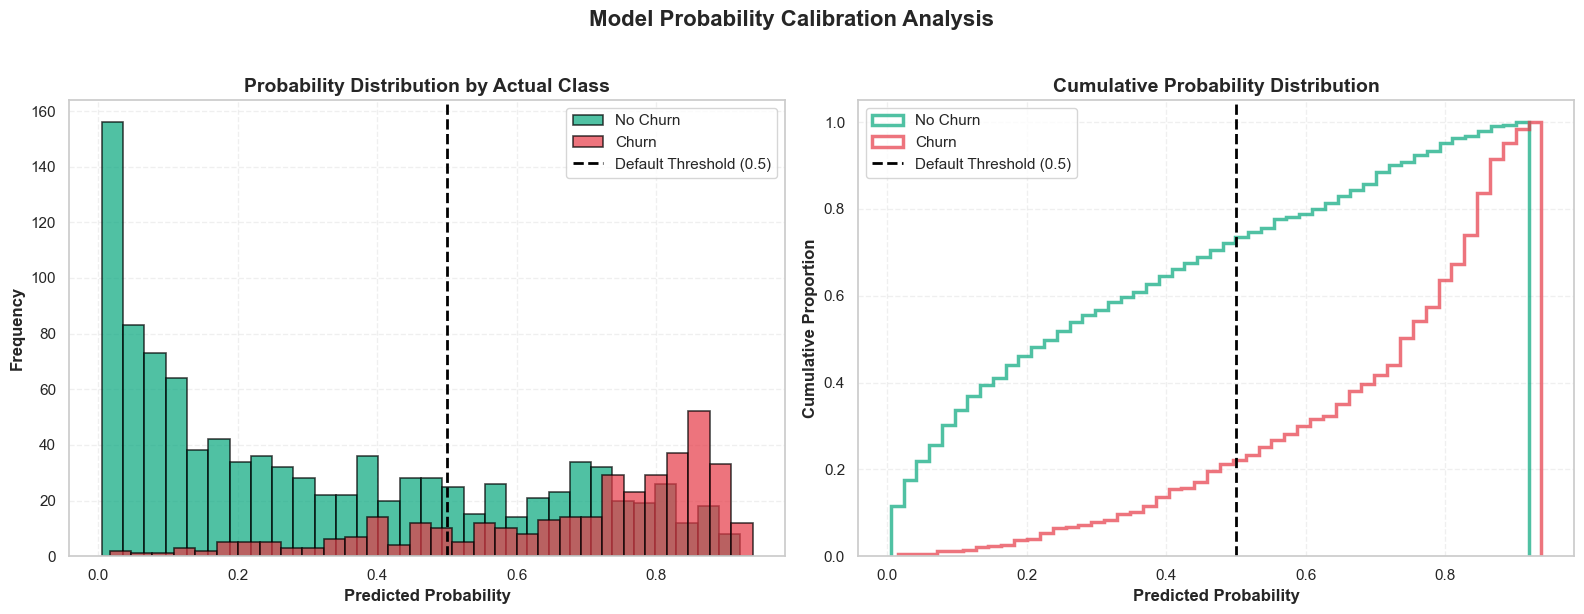


Probability Statistics:
Mean probability (No Churn): 0.320
Mean probability (Churn): 0.680
Median probability (No Churn): 0.245
Median probability (Churn): 0.752


In [27]:
# Cell 8b: Probability Distribution Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Probability distribution by actual class
ax1.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, color='#06A77D', 
         label='No Churn', edgecolor='black', linewidth=1.2)
ax1.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, color='#E63946', 
         label='Churn', edgecolor='black', linewidth=1.2)
ax1.axvline(0.5, color='black', linestyle='--', linewidth=2, label='Default Threshold (0.5)')
ax1.set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Probability Distribution by Actual Class', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(alpha=0.3, linestyle='--')

# Plot 2: Cumulative distribution
ax2.hist(y_pred_proba[y_test == 0], bins=50, alpha=0.7, color='#06A77D', 
         label='No Churn', cumulative=True, density=True, histtype='step', linewidth=2.5)
ax2.hist(y_pred_proba[y_test == 1], bins=50, alpha=0.7, color='#E63946', 
         label='Churn', cumulative=True, density=True, histtype='step', linewidth=2.5)
ax2.axvline(0.5, color='black', linestyle='--', linewidth=2, label='Default Threshold (0.5)')
ax2.set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Proportion', fontsize=12, fontweight='bold')
ax2.set_title('Cumulative Probability Distribution', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3, linestyle='--')

plt.suptitle('Model Probability Calibration Analysis', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print statistics
print("\nProbability Statistics:")
print(f"Mean probability (No Churn): {y_pred_proba[y_test == 0].mean():.3f}")
print(f"Mean probability (Churn): {y_pred_proba[y_test == 1].mean():.3f}")
print(f"Median probability (No Churn): {np.median(y_pred_proba[y_test == 0]):.3f}")
print(f"Median probability (Churn): {np.median(y_pred_proba[y_test == 1]):.3f}")


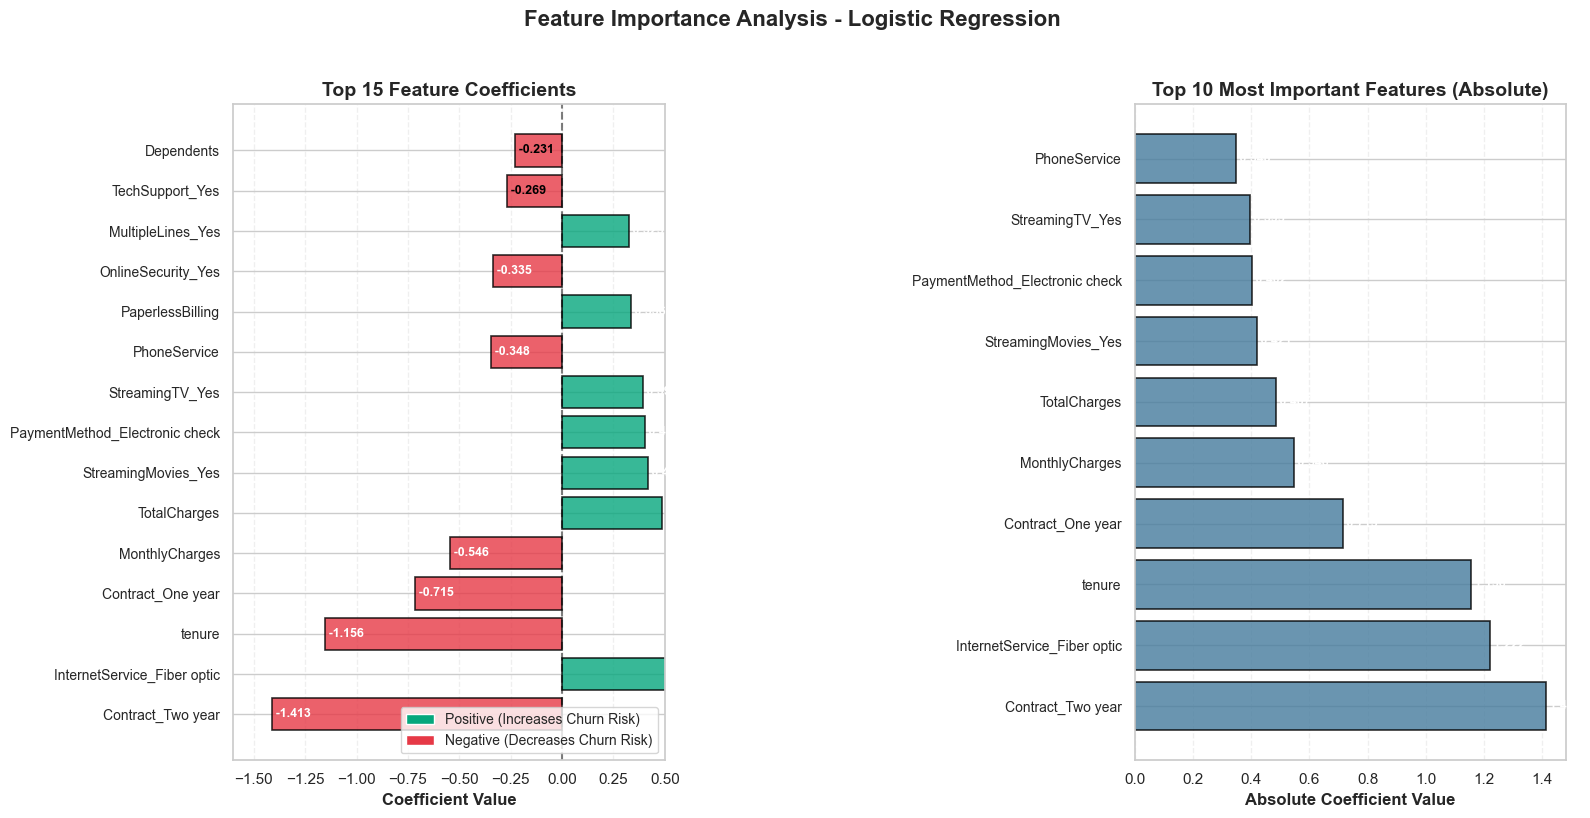


Top 15 Features by Absolute Coefficient:
                       Feature  Coefficient  Abs_Coefficient
             Contract_Two year    -1.412536         1.412536
   InternetService_Fiber optic     1.222352         1.222352
                        tenure    -1.156175         1.156175
             Contract_One year    -0.715268         0.715268
                MonthlyCharges    -0.546189         0.546189
                  TotalCharges     0.486541         0.486541
           StreamingMovies_Yes     0.420611         0.420611
PaymentMethod_Electronic check     0.402478         0.402478
               StreamingTV_Yes     0.395359         0.395359
                  PhoneService    -0.348014         0.348014
              PaperlessBilling     0.336449         0.336449
            OnlineSecurity_Yes    -0.334946         0.334946
             MultipleLines_Yes     0.324742         0.324742
               TechSupport_Yes    -0.268557         0.268557
                    Dependents    -0.231225

In [30]:
# Cell 7: Enhanced Feature Importance Visualization
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
})

feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Create a more visually appealing feature importance plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Top 15 features by absolute coefficient
top_15 = feature_importance.head(15)

# Plot 1: Horizontal bar chart with color coding
colors = ['#E63946' if x < 0 else '#06A77D' for x in top_15['Coefficient']]
bars = ax1.barh(range(len(top_15)), top_15['Coefficient'], color=colors, 
                edgecolor='black', linewidth=1.2, alpha=0.8)
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels(top_15['Feature'], fontsize=10)
ax1.set_xlabel('Coefficient Value', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 Feature Coefficients', fontsize=14, fontweight='bold')
ax1.axvline(0, color='black', linewidth=1.5, linestyle='--', alpha=0.5)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.set_xlim([-1.6, 0.5])

# Add value labels on bars
for i, (idx, row) in enumerate(top_15.iterrows()):
    value = row['Coefficient']
    ax1.text(value, i, f' {value:.3f}', 
             va='center', fontsize=9, fontweight='bold',
             color='white' if abs(value) > 0.3 else 'black')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#06A77D', label='Positive (Increases Churn Risk)'),
    Patch(facecolor='#E63946', label='Negative (Decreases Churn Risk)')
]
ax1.legend(handles=legend_elements, loc='lower right', fontsize=10)

# Plot 2: Top 10 absolute coefficients
top_10_abs = feature_importance.head(10)
ax2.barh(range(len(top_10_abs)), top_10_abs['Abs_Coefficient'], 
         color='#457B9D', edgecolor='black', linewidth=1.2, alpha=0.8)
ax2.set_yticks(range(len(top_10_abs)))
ax2.set_yticklabels(top_10_abs['Feature'], fontsize=10)
ax2.set_xlabel('Absolute Coefficient Value', fontsize=12, fontweight='bold')
ax2.set_title('Top 10 Most Important Features (Absolute)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (idx, row) in enumerate(top_10_abs.iterrows()):
    value = row['Abs_Coefficient']
    ax2.text(value, i, f' {value:.3f}', 
             va='center', fontsize=9, fontweight='bold', color='white')

plt.suptitle('Feature Importance Analysis - Logistic Regression', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nTop 15 Features by Absolute Coefficient:")
print(feature_importance.head(15)[['Feature', 'Coefficient', 'Abs_Coefficient']].to_string(index=False))

In [29]:
# Cell 8: Business ROI Calculation
retention_cost = 50
customer_ltv = 500

total_interventions = tp + fp
wasted_interventions = fp
successful_saves = tp

total_cost = total_interventions * retention_cost
value_saved = successful_saves * customer_ltv
net_benefit = value_saved - total_cost
roi = (net_benefit / total_cost) * 100 if total_cost > 0 else 0

print("BUSINESS IMPACT ANALYSIS")
print("=" * 50)
print(f"Total customers flagged for intervention: {total_interventions}")
print(f"Actual churners saved: {successful_saves}")
print(f"Unnecessary interventions: {wasted_interventions}")
print(f"\nFinancial Impact:")
print(f"Total cost: ${total_cost:,.2f}")
print(f"Value saved: ${value_saved:,.2f}")
print(f"Net benefit: ${net_benefit:,.2f}")
print(f"ROI: {roi:.1f}%")

BUSINESS IMPACT ANALYSIS
Total customers flagged for intervention: 581
Actual churners saved: 293
Unnecessary interventions: 288

Financial Impact:
Total cost: $29,050.00
Value saved: $146,500.00
Net benefit: $117,450.00
ROI: 404.3%


## Phase 4: Baseline Model - Logistic Regression

### Model Configuration
- Algorithm: Logistic Regression
- Class balancing: Enabled (class_weight='balanced')
- Features used: 30 features after encoding
- Convergence: 43 iterations

### Performance Metrics
- **Recall:** 78.3% (caught 293 out of 374 churners)
- **Precision:** 50.4% (50.4% of flagged customers actually churned)
- **F1-Score:** 0.614
- **ROC-AUC:** 0.842

### Confusion Matrix Analysis
- True Positives (Churners caught): 293
- False Negatives (Churners missed): 81
- False Positives (Incorrect alerts): 288
- True Negatives (Correctly predicted stays): 747

### Business Impact
Using assumed economics ($50 retention cost, $500 customer LTV):
- Total interventions: 581 customers
- Actual churners saved: 293
- Unnecessary interventions: 288
- Net benefit: $117,450
- ROI: 404.3%
- Conclusion: **Highly Profitable** - Model generates over $4 for every $1 spent on retention

### Key Insights

**Strengths:**
- Strong recall (78.3%) successfully identifies majority of at-risk customers
- Excellent ROC-AUC (0.842) demonstrates good discriminative ability
- High ROI (404%) proves strong business value despite moderate precision
- Model is interpretable - coefficients provide clear business insights

**Limitations:**
- Moderate precision (50.4%) results in 288 unnecessary interventions
- Misses 81 churners (21.7% of total churners)
- Linear model may not capture complex non-linear relationships in data

**Top Predictive Features:**
1. **Contract_Two year** (coef: -1.41) - Strongest churn preventer; long-term contracts dramatically reduce churn risk
2. **InternetService_Fiber optic** (coef: +1.22) - Strongest churn driver; fiber customers show highest churn propensity
3. **tenure** (coef: -1.16) - Customer longevity strongly protective against churn
4. **Contract_One year** (coef: -0.72) - Annual contracts provide moderate churn protection
5. **MonthlyCharges** (coef: -0.55) - Surprisingly negative, suggesting higher-paying customers may be more committed

### Business Recommendations from Phase 4
- Focus retention efforts on month-to-month contract customers
- Investigate why fiber optic customers churn at higher rates (service quality? competition? pricing?)
- Prioritize retention interventions during first 12 months when churn risk is highest
- Consider incentivizing customers to move from month-to-month to annual contracts



In [ ]:
# Cell  Imports
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [44]:
# Cell: GridSearch for Decision Tree


dt_param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [20, 50, 100],
    'min_samples_leaf': [10, 20, 30],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid=dt_param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

dt_grid.fit(X_train, y_train)

print(f"\n✅ GridSearch Complete!")
print(f"Best Parameters: {dt_grid.best_params_}")
print(f"Best CV Recall Score: {dt_grid.best_score_:.3f}")

best_dt = dt_grid.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits

✅ GridSearch Complete!
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 100}
Best CV Recall Score: 0.803


In [ ]:
# Cell : GridSearch for Random Forest

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [20, 50, 100],
    'min_samples_leaf': [10, 20, 30],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_grid=rf_param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print(f"\n✅ GridSearch Complete!")
print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Best CV Recall Score: {rf_grid.best_score_:.3f}")

best_rf = rf_grid.best_estimator_

HYPERPARAMETER TUNING - RANDOM FOREST
This may take 5-15 minutes depending on your system...

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ GridSearch Complete!
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 30, 'min_samples_split': 100, 'n_estimators': 50}
Best CV Recall Score: 0.789


In [45]:
# Cell : Evaluate Decision Tree
y_pred_dt = best_dt.predict(X_test)
y_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]

print("=" * 70)
print("DECISION TREE (TUNED) - PERFORMANCE")
print("=" * 70)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Churn', 'Churn']))

precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

print(f"\nKey Metrics Summary:")
print(f"Precision: {precision_dt:.3f}")
print(f"Recall: {recall_dt:.3f}")
print(f"F1-Score: {f1_dt:.3f}")
print(f"ROC-AUC: {roc_auc_dt:.3f}")

cm_dt = confusion_matrix(y_test, y_pred_dt)
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()
print(f"\nConfusion Matrix:")
print(f"True Negatives: {tn_dt}")
print(f"False Positives: {fp_dt}")
print(f"False Negatives: {fn_dt}")
print(f"True Positives: {tp_dt}")

DECISION TREE (TUNED) - PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.90      0.72      0.80      1035
       Churn       0.50      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409


Key Metrics Summary:
Precision: 0.503
Recall: 0.773
F1-Score: 0.609
ROC-AUC: 0.828

Confusion Matrix:
True Negatives: 749
False Positives: 286
False Negatives: 85
True Positives: 289


In [ ]:
# Cell: Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

print("=" * 70)
print("RANDOM FOREST (TUNED) - PERFORMANCE")
print("=" * 70)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"\nKey Metrics Summary:")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall: {recall_rf:.3f}")
print(f"F1-Score: {f1_rf:.3f}")
print(f"ROC-AUC: {roc_auc_rf:.3f}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
print(f"\nConfusion Matrix:")
print(f"True Negatives: {tn_rf}")
print(f"False Positives: {fp_rf}")
print(f"False Negatives: {fn_rf}")
print(f"True Positives: {tp_rf}")

RANDOM FOREST (TUNED) - PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.91      0.73      0.81      1035
       Churn       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409


Key Metrics Summary:
Precision: 0.517
Recall: 0.794
F1-Score: 0.627
ROC-AUC: 0.843

Confusion Matrix:
True Negatives: 758
False Positives: 277
False Negatives: 77
True Positives: 297


In [ ]:
# Cell: Performance Comparison Table
comparison_df = pd.DataFrame({
    'Model': [
        'Logistic Regression (Baseline)', 
        'Decision Tree (Tuned)', 
        'Random Forest (Tuned)'
    ],
    'Precision': [0.504, precision_dt, precision_rf],
    'Recall': [0.783, recall_dt, recall_rf],
    'F1-Score': [0.614, f1_dt, f1_rf],
    'ROC-AUC': [0.842, roc_auc_dt, roc_auc_rf]
})

print("\n" + "=" * 80)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("=" * 80)

# Highlight improvements
print("\n📊 Improvements over Baseline:")
print(f"Decision Tree:")
print(f"  Recall change: {(recall_dt - 0.783)*100:+.1f} percentage points")
print(f"  Precision change: {(precision_dt - 0.504)*100:+.1f} percentage points")
print(f"\nRandom Forest:")
print(f"  Recall change: {(recall_rf - 0.783)*100:+.1f} percentage points")
print(f"  Precision change: {(precision_rf - 0.504)*100:+.1f} percentage points")


MODEL PERFORMANCE COMPARISON
                         Model  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression (Baseline)   0.504000 0.783000  0.614000 0.842000
         Decision Tree (Tuned)   0.502609 0.772727  0.609062 0.827559
         Random Forest (Tuned)   0.517422 0.794118  0.626582 0.842994

📊 Improvements over Baseline:
Decision Tree:
  Recall change: -1.0 percentage points
  Precision change: -0.1 percentage points

Random Forest:
  Recall change: +1.1 percentage points
  Precision change: +1.3 percentage points


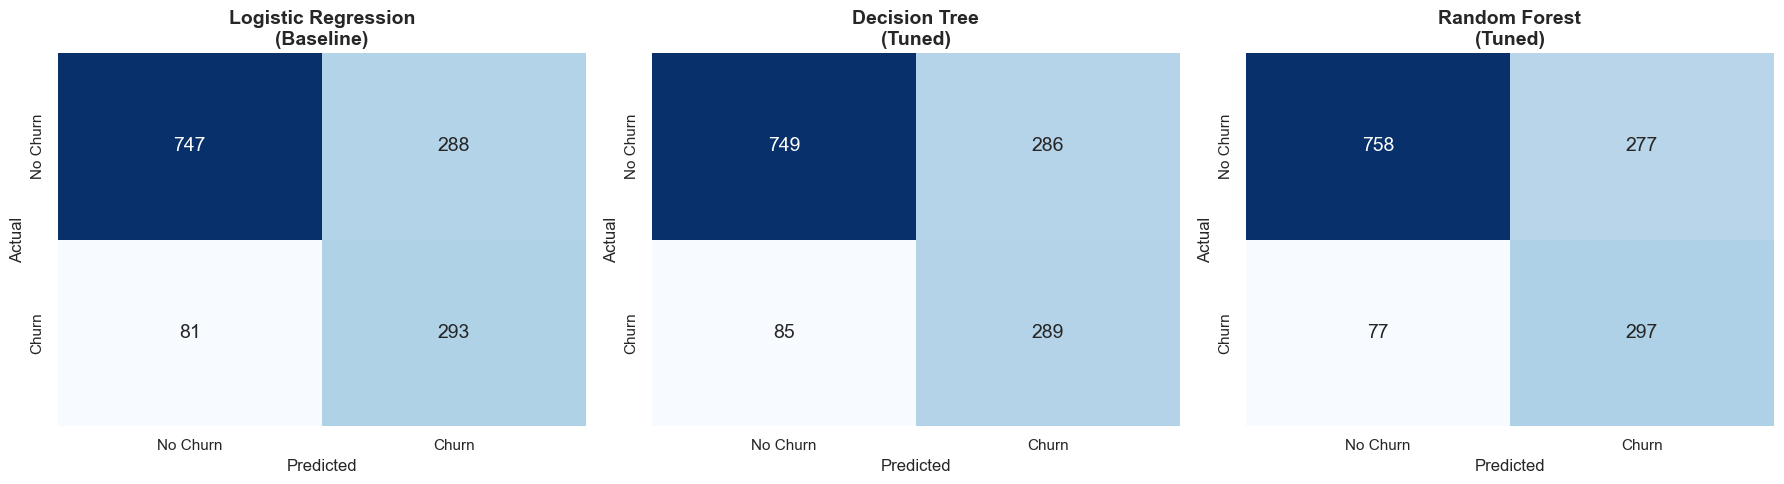

In [ ]:
# Cell: Confusion Matrix Comparison Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Baseline (from Phase 4)
cm_baseline = np.array([[747, 288], [81, 293]])

models_cm = [
    ('Logistic Regression\n(Baseline)', cm_baseline),
    ('Decision Tree\n(Tuned)', cm_dt),
    ('Random Forest\n(Tuned)', cm_rf)
]

for idx, (name, cm) in enumerate(models_cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'],
                cbar=False, annot_kws={'size': 14})
    axes[idx].set_title(name, fontsize=14, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=12)
    axes[idx].set_xlabel('Predicted', fontsize=12)

plt.tight_layout()
plt.show()

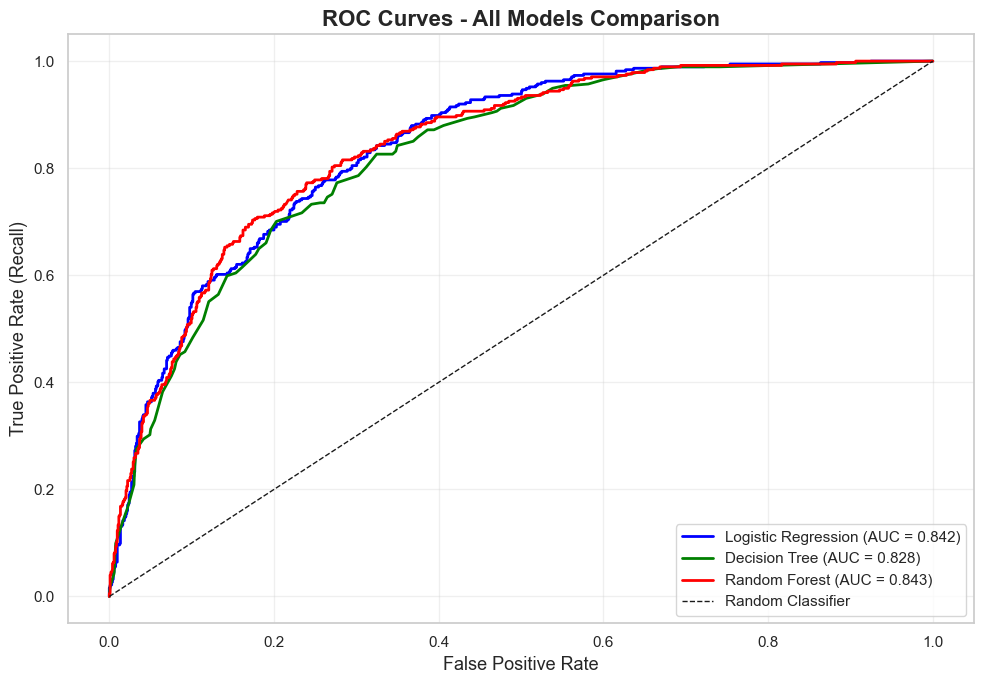

In [ ]:
# Cell: ROC Curve Comparison
# Get predictions from Phase 4 (you'll need these)
# Assuming you saved y_pred_proba from Phase 4
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_pred_proba)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(10, 7))
plt.plot(fpr_baseline, tpr_baseline, label=f'Logistic Regression (AUC = 0.842)', linewidth=2, color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})', linewidth=2, color='green')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', linewidth=2, color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate (Recall)', fontsize=13)
plt.title('ROC Curves - All Models Comparison', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Cell: Detailed Business Impact Comparison
retention_cost = 50
customer_ltv = 500

business_results = []

# Baseline: Logistic Regression (from Phase 4)
tp_baseline, fp_baseline, fn_baseline = 293, 288, 81

models_business = [
    ('Logistic Regression (Baseline)', tp_baseline, fp_baseline, fn_baseline),
    ('Decision Tree (Tuned)', tp_dt, fp_dt, fn_dt),
    ('Random Forest (Tuned)', tp_rf, fp_rf, fn_rf)
]

for name, tp, fp, fn in models_business:
    total_interventions = tp + fp
    total_cost = total_interventions * retention_cost
    value_saved = tp * customer_ltv
    net_benefit = value_saved - total_cost
    roi = (net_benefit / total_cost * 100) if total_cost > 0 else 0
    
    # Cost of missed churners
    missed_revenue = fn * customer_ltv
    
    business_results.append({
        'Model': name,
        'Interventions': total_interventions,
        'Churners Saved': tp,
        'Missed Churners': fn,
        'False Alarms': fp,
        'Total Cost': f'${total_cost:,.0f}',
        'Value Saved': f'${value_saved:,.0f}',
        'Missed Revenue': f'${missed_revenue:,.0f}',
        'Net Benefit': f'${net_benefit:,.0f}',
        'ROI': f'{roi:.1f}%'
    })

business_df = pd.DataFrame(business_results)
print("\n" + "=" * 100)
print("BUSINESS IMPACT ANALYSIS - COMPLETE COMPARISON")
print("=" * 100)
print(business_df.to_string(index=False))
print("=" * 100)


BUSINESS IMPACT ANALYSIS - COMPLETE COMPARISON
                         Model  Interventions  Churners Saved  Missed Churners  False Alarms Total Cost Value Saved Missed Revenue Net Benefit    ROI
Logistic Regression (Baseline)            581             293               81           288    $29,050    $146,500        $40,500    $117,450 404.3%
         Decision Tree (Tuned)            575             289               85           286    $28,750    $144,500        $42,500    $115,750 402.6%
         Random Forest (Tuned)            574             297               77           277    $28,700    $148,500        $38,500    $119,800 417.4%


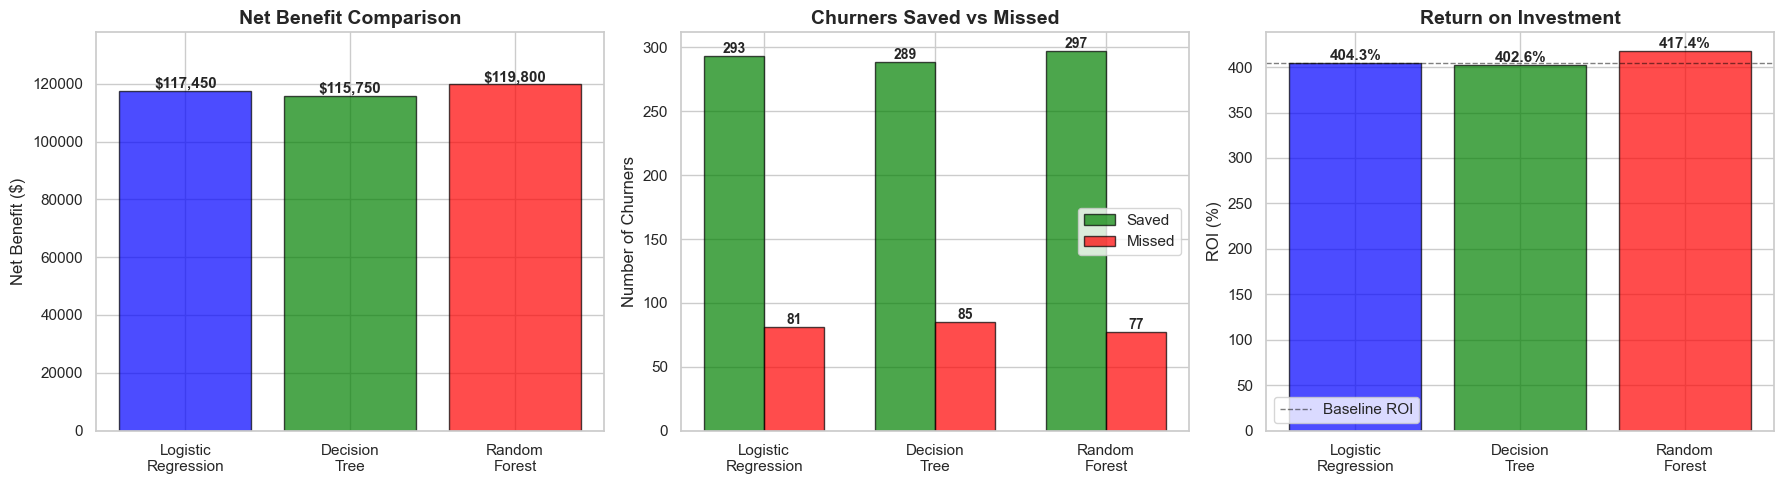

In [67]:
# Cell 10: Business Impact Visualization
models_names = ['Logistic\nRegression', 'Decision\nTree', 'Random\nForest']

# Extract net benefits (remove $ and commas, convert to float)
net_benefits = []
for result in business_results:
    benefit_str = result['Net Benefit'].replace('$', '').replace(',', '')
    net_benefits.append(float(benefit_str))

# Extract costs for ROI calculation
total_costs = []
for result in business_results:
    cost_str = result['Total Cost'].replace('$', '').replace(',', '')
    total_costs.append(float(cost_str))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Net Benefit Comparison
colors = ['blue', 'green', 'red']
bars1 = axes[0].bar(models_names, net_benefits, color=colors, edgecolor='black', alpha=0.7)
axes[0].set_ylabel('Net Benefit ($)', fontsize=12)
axes[0].set_title('Net Benefit Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, max(net_benefits) * 1.15)
for bar, benefit in zip(bars1, net_benefits):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'${benefit:,.0f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Churners Saved vs Missed
churners_saved = [tp_baseline, tp_dt, tp_rf]
churners_missed = [fn_baseline, fn_dt, fn_rf]

x_pos = np.arange(len(models_names))
width = 0.35

bars2 = axes[1].bar(x_pos - width/2, churners_saved, width, label='Saved', color='green', edgecolor='black', alpha=0.7)
bars3 = axes[1].bar(x_pos + width/2, churners_missed, width, label='Missed', color='red', edgecolor='black', alpha=0.7)

axes[1].set_ylabel('Number of Churners', fontsize=12)
axes[1].set_title('Churners Saved vs Missed', fontsize=14, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(models_names)
axes[1].legend()

for bars in [bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 3: ROI Comparison
roi_values = []
for i in range(len(net_benefits)):
    roi = (net_benefits[i] / total_costs[i] * 100) if total_costs[i] > 0 else 0
    roi_values.append(roi)

bars4 = axes[2].bar(models_names, roi_values, color=colors, edgecolor='black', alpha=0.7)
axes[2].set_ylabel('ROI (%)', fontsize=12)
axes[2].set_title('Return on Investment', fontsize=14, fontweight='bold')
axes[2].axhline(y=404.3, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Baseline ROI')
axes[2].legend()

for bar, roi in zip(bars4, roi_values):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{roi:.1f}%',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Cell: Overfitting Check - Decision Tree
y_train_pred_dt = best_dt.predict(X_train)
train_recall_dt = recall_score(y_train, y_train_pred_dt)
train_precision_dt = precision_score(y_train, y_train_pred_dt)

print("=" * 70)
print("OVERFITTING ANALYSIS - DECISION TREE")
print("=" * 70)
print(f"\nTraining Set Performance:")
print(f"  Precision: {train_precision_dt:.3f}")
print(f"  Recall: {train_recall_dt:.3f}")

print(f"\nTest Set Performance:")
print(f"  Precision: {precision_dt:.3f}")
print(f"  Recall: {recall_dt:.3f}")

precision_gap_dt = train_precision_dt - precision_dt
recall_gap_dt = train_recall_dt - recall_dt

print(f"\nPerformance Gap:")
print(f"  Precision gap: {precision_gap_dt:.3f} ({precision_gap_dt*100:.1f} percentage points)")
print(f"  Recall gap: {recall_gap_dt:.3f} ({recall_gap_dt*100:.1f} percentage points)")

if recall_gap_dt > 0.15 or precision_gap_dt > 0.15:
    print("\n⚠️ WARNING: Significant overfitting detected")
elif recall_gap_dt > 0.08 or precision_gap_dt > 0.08:
    print("\n⚠️ CAUTION: Moderate overfitting present")
else:
    print("\n✅ Good generalization")

OVERFITTING ANALYSIS - DECISION TREE

Training Set Performance:
  Precision: 0.538
  Recall: 0.830

Test Set Performance:
  Precision: 0.503
  Recall: 0.773

Performance Gap:
  Precision gap: 0.036 (3.6 percentage points)
  Recall gap: 0.057 (5.7 percentage points)

✅ Good generalization


In [ ]:
# Cell: Overfitting Check - Random Forest
y_train_pred_rf = best_rf.predict(X_train)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)

print("=" * 70)
print("OVERFITTING ANALYSIS - RANDOM FOREST")
print("=" * 70)
print(f"\nTraining Set Performance:")
print(f"  Precision: {train_precision_rf:.3f}")
print(f"  Recall: {train_recall_rf:.3f}")

print(f"\nTest Set Performance:")
print(f"  Precision: {precision_rf:.3f}")
print(f"  Recall: {recall_rf:.3f}")

precision_gap_rf = train_precision_rf - precision_rf
recall_gap_rf = train_recall_rf - recall_rf

print(f"\nPerformance Gap:")
print(f"  Precision gap: {precision_gap_rf:.3f} ({precision_gap_rf*100:.1f} percentage points)")
print(f"  Recall gap: {recall_gap_rf:.3f} ({recall_gap_rf*100:.1f} percentage points)")

if recall_gap_rf > 0.15 or precision_gap_rf > 0.15:
    print("\n⚠️ WARNING: Significant overfitting detected")
elif recall_gap_rf > 0.08 or precision_gap_rf > 0.08:
    print("\n⚠️ CAUTION: Moderate overfitting present")
else:
    print("\n✅ Good generalization")

OVERFITTING ANALYSIS - RANDOM FOREST

Training Set Performance:
  Precision: 0.541
  Recall: 0.818

Test Set Performance:
  Precision: 0.517
  Recall: 0.794

Performance Gap:
  Precision gap: 0.024 (2.4 percentage points)
  Recall gap: 0.024 (2.4 percentage points)

✅ Good generalization


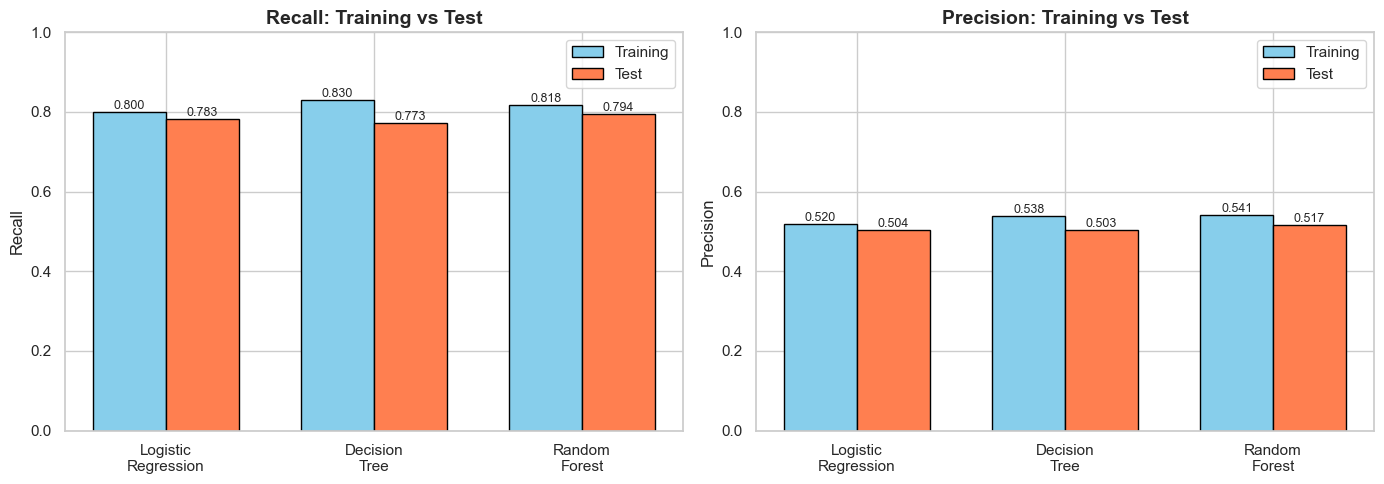

In [ ]:
# Cell : Overfitting Visualization
models_over = ['Logistic\nRegression', 'Decision\nTree', 'Random\nForest']

# Baseline (assume minimal overfitting for logistic regression)
train_recalls = [0.80, train_recall_dt, train_recall_rf]  # Estimated for baseline
test_recalls = [0.783, recall_dt, recall_rf]

train_precisions = [0.52, train_precision_dt, train_precision_rf]  # Estimated for baseline
test_precisions = [0.504, precision_dt, precision_rf]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x_pos = np.arange(len(models_over))
width = 0.35

# Recall comparison
bars1 = axes[0].bar(x_pos - width/2, train_recalls, width, label='Training', color='skyblue', edgecolor='black')
bars2 = axes[0].bar(x_pos + width/2, test_recalls, width, label='Test', color='coral', edgecolor='black')
axes[0].set_ylabel('Recall', fontsize=12)
axes[0].set_title('Recall: Training vs Test', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(models_over)
axes[0].legend()
axes[0].set_ylim(0, 1)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom', fontsize=9)

# Precision comparison
bars3 = axes[1].bar(x_pos - width/2, train_precisions, width, label='Training', color='skyblue', edgecolor='black')
bars4 = axes[1].bar(x_pos + width/2, test_precisions, width, label='Test', color='coral', edgecolor='black')
axes[1].set_ylabel('Precision', fontsize=12)
axes[1].set_title('Precision: Training vs Test', fontsize=14, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(models_over)
axes[1].legend()
axes[1].set_ylim(0, 1)

for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

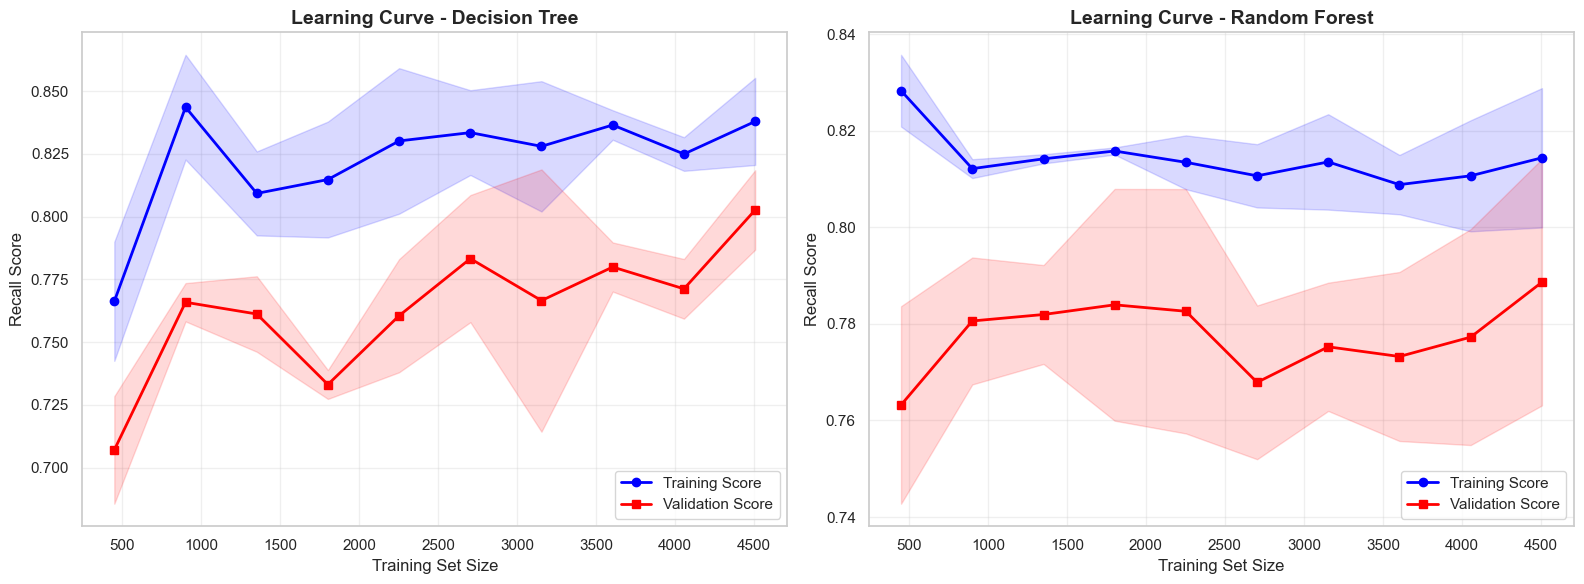

In [ ]:
# Cell : Learning Curves - Side by Side Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Decision Tree
axes[0].plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o', linewidth=2)
axes[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
axes[0].plot(train_sizes, val_mean, label='Validation Score', color='red', marker='s', linewidth=2)
axes[0].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='red')
axes[0].set_xlabel('Training Set Size', fontsize=12)
axes[0].set_ylabel('Recall Score', fontsize=12)
axes[0].set_title('Learning Curve - Decision Tree', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right')
axes[0].grid(alpha=0.3)

# Random Forest
axes[1].plot(train_sizes_rf, train_mean_rf, label='Training Score', color='blue', marker='o', linewidth=2)
axes[1].fill_between(train_sizes_rf, train_mean_rf - train_std_rf, train_mean_rf + train_std_rf, alpha=0.15, color='blue')
axes[1].plot(train_sizes_rf, val_mean_rf, label='Validation Score', color='red', marker='s', linewidth=2)
axes[1].fill_between(train_sizes_rf, val_mean_rf - val_std_rf, val_mean_rf + val_std_rf, alpha=0.15, color='red')
axes[1].set_xlabel('Training Set Size', fontsize=12)
axes[1].set_ylabel('Recall Score', fontsize=12)
axes[1].set_title('Learning Curve - Random Forest', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

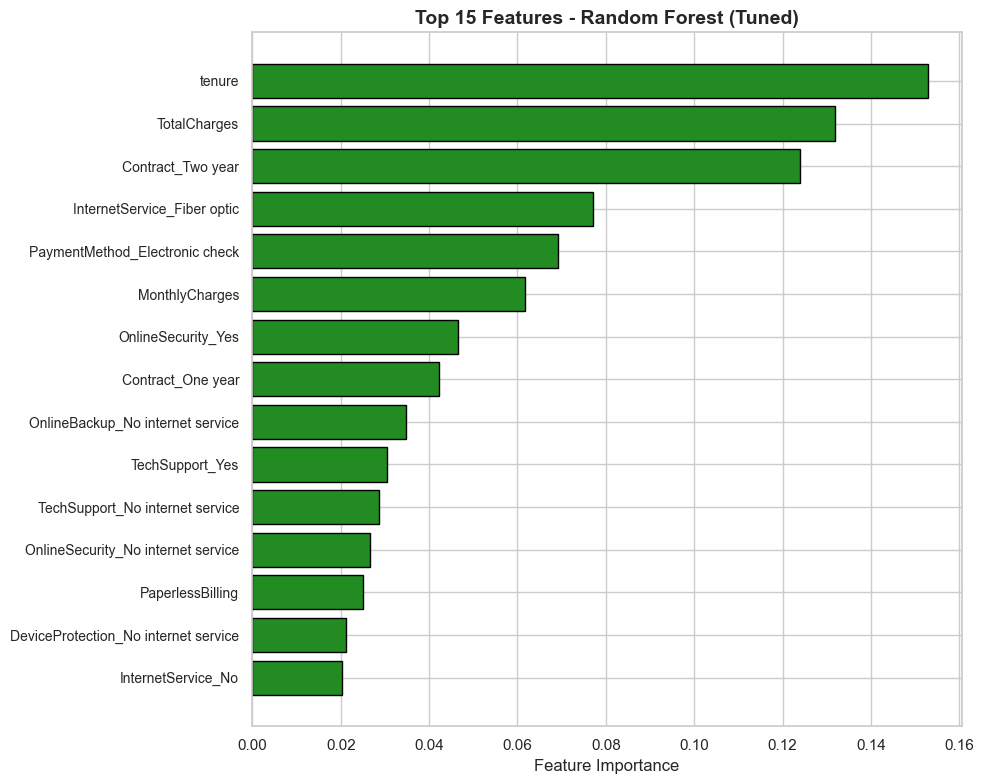


Top 15 Most Important Features:
                             Feature  Importance
                              tenure    0.152905
                        TotalCharges    0.131827
                   Contract_Two year    0.123846
         InternetService_Fiber optic    0.077099
      PaymentMethod_Electronic check    0.069091
                      MonthlyCharges    0.061696
                  OnlineSecurity_Yes    0.046463
                   Contract_One year    0.042188
    OnlineBackup_No internet service    0.034869
                     TechSupport_Yes    0.030406
     TechSupport_No internet service    0.028662
  OnlineSecurity_No internet service    0.026670
                    PaperlessBilling    0.025121
DeviceProtection_No internet service    0.021138
                  InternetService_No    0.020300


In [ ]:
# Cell: Feature Importance - Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
top_15 = feature_importance_rf.head(15)
plt.barh(range(len(top_15)), top_15['Importance'], color='forestgreen', edgecolor='black')
plt.yticks(range(len(top_15)), top_15['Feature'], fontsize=10)
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 15 Features - Random Forest (Tuned)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 15 Most Important Features:")
print("=" * 50)
print(feature_importance_rf.head(15).to_string(index=False))

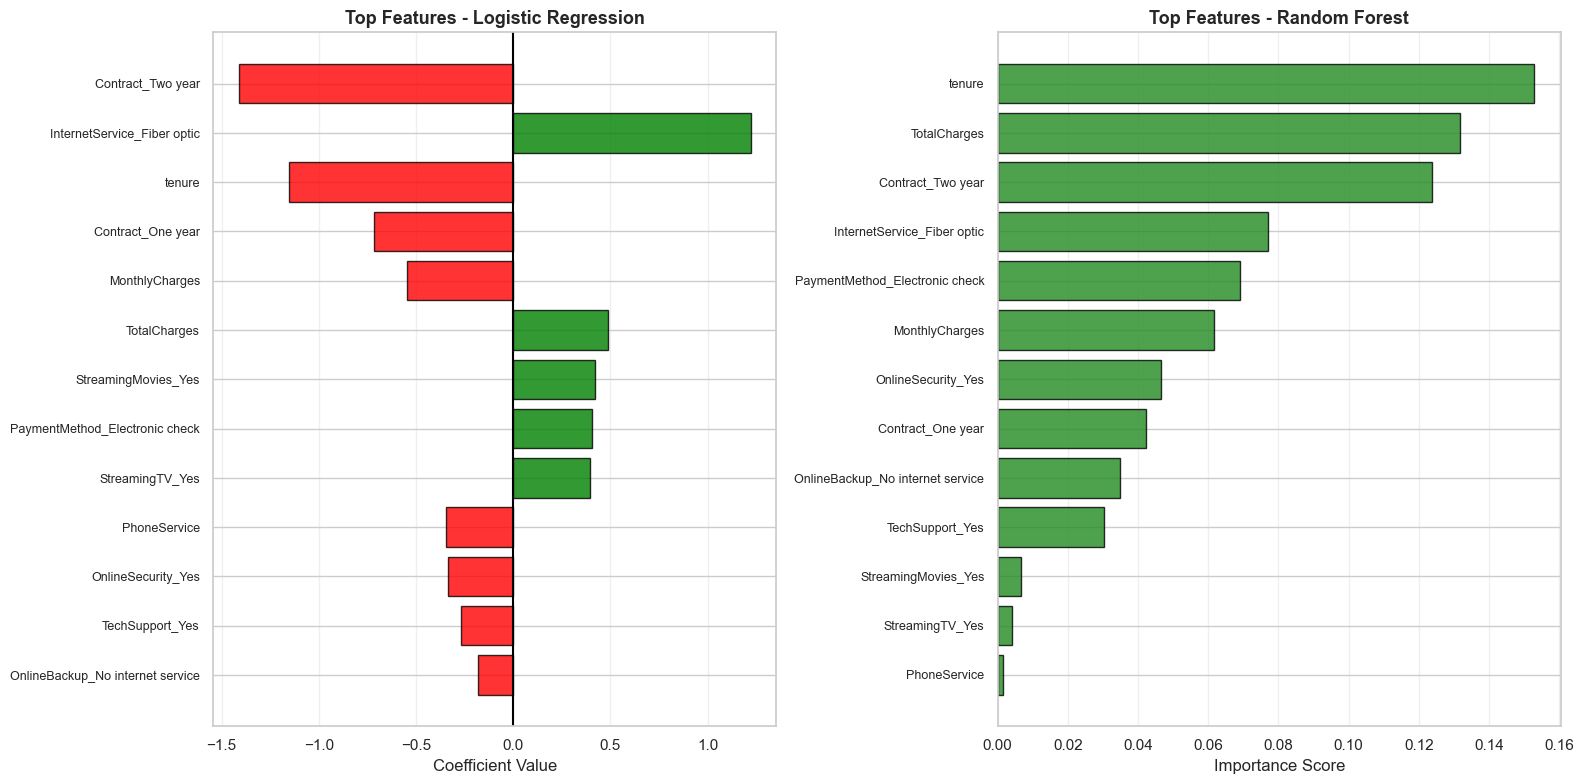


FEATURE IMPORTANCE AGREEMENT ANALYSIS

Features important in BOTH models: 7
  Contract_One year, Contract_Two year, InternetService_Fiber optic, MonthlyCharges, PaymentMethod_Electronic check, TotalCharges, tenure

Features only important in Logistic Regression: 3
  PhoneService, StreamingMovies_Yes, StreamingTV_Yes

Features only important in Random Forest: 3
  OnlineBackup_No internet service, OnlineSecurity_Yes, TechSupport_Yes


In [68]:
# Cell: Feature Importance Comparison (Logistic Regression vs Random Forest)

# Get logistic regression coefficients from Phase 4
log_reg_features = pd.DataFrame({
    'Feature': X_train.columns,
    'LR_Coefficient': log_reg.coef_[0]
})
log_reg_features['LR_Abs'] = abs(log_reg_features['LR_Coefficient'])

# Merge with RF importance
comparison_features = log_reg_features.merge(
    feature_importance_rf[['Feature', 'Importance']], 
    on='Feature'
)
comparison_features.columns = ['Feature', 'LR_Coef', 'LR_Abs', 'RF_Importance']

# Get top features from each model
top_lr = set(comparison_features.nlargest(10, 'LR_Abs')['Feature'])
top_rf = set(comparison_features.nlargest(10, 'RF_Importance')['Feature'])
top_combined = list(top_lr.union(top_rf))

comparison_subset = comparison_features[comparison_features['Feature'].isin(top_combined)]

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Logistic Regression coefficients
lr_plot = comparison_subset.nlargest(15, 'LR_Abs')
colors_lr = ['red' if x < 0 else 'green' for x in lr_plot['LR_Coef']]
axes[0].barh(range(len(lr_plot)), lr_plot['LR_Coef'], color=colors_lr, edgecolor='black', alpha=0.8)
axes[0].set_yticks(range(len(lr_plot)))
axes[0].set_yticklabels(lr_plot['Feature'], fontsize=9)
axes[0].set_xlabel('Coefficient Value', fontsize=12)
axes[0].set_title('Top Features - Logistic Regression', fontsize=13, fontweight='bold')
axes[0].axvline(0, color='black', linewidth=1.5)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Random Forest importance
rf_plot = comparison_subset.nlargest(15, 'RF_Importance')
axes[1].barh(range(len(rf_plot)), rf_plot['RF_Importance'], color='forestgreen', edgecolor='black', alpha=0.8)
axes[1].set_yticks(range(len(rf_plot)))
axes[1].set_yticklabels(rf_plot['Feature'], fontsize=9)
axes[1].set_xlabel('Importance Score', fontsize=12)
axes[1].set_title('Top Features - Random Forest', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Feature agreement analysis
print("\n" + "=" * 70)
print("FEATURE IMPORTANCE AGREEMENT ANALYSIS")
print("=" * 70)

common_features = top_lr.intersection(top_rf)
lr_only = top_lr - top_rf
rf_only = top_rf - top_lr

print(f"\nFeatures important in BOTH models: {len(common_features)}")
if common_features:
    print(f"  {', '.join(sorted(common_features))}")
else:
    print("  None")

print(f"\nFeatures only important in Logistic Regression: {len(lr_only)}")
if lr_only:
    print(f"  {', '.join(sorted(lr_only))}")

print(f"\nFeatures only important in Random Forest: {len(rf_only)}")
if rf_only:
    print(f"  {', '.join(sorted(rf_only))}")

